# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from joblib import parallel_backend
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/KHTN/Machine Learning/Final_project/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
display(df.shape)
display(df.info())

(35887, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


None

In [ ]:
df['emotion'].value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

<ipython-input-117-7e7532670890>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, palette='viridis')


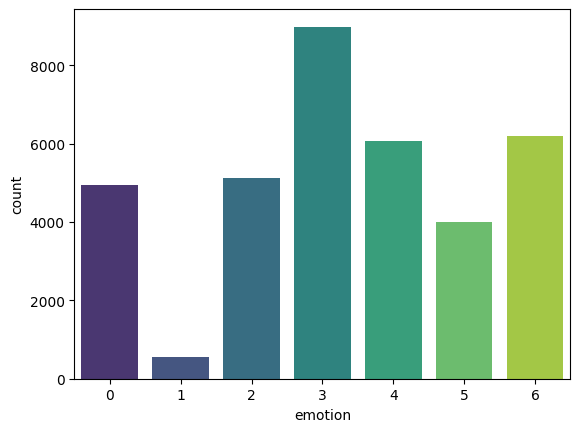

In [ ]:
sns.countplot(x='emotion', data=df, palette='viridis')
plt.show()

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
images, labels = parse_data(df)

In [ ]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

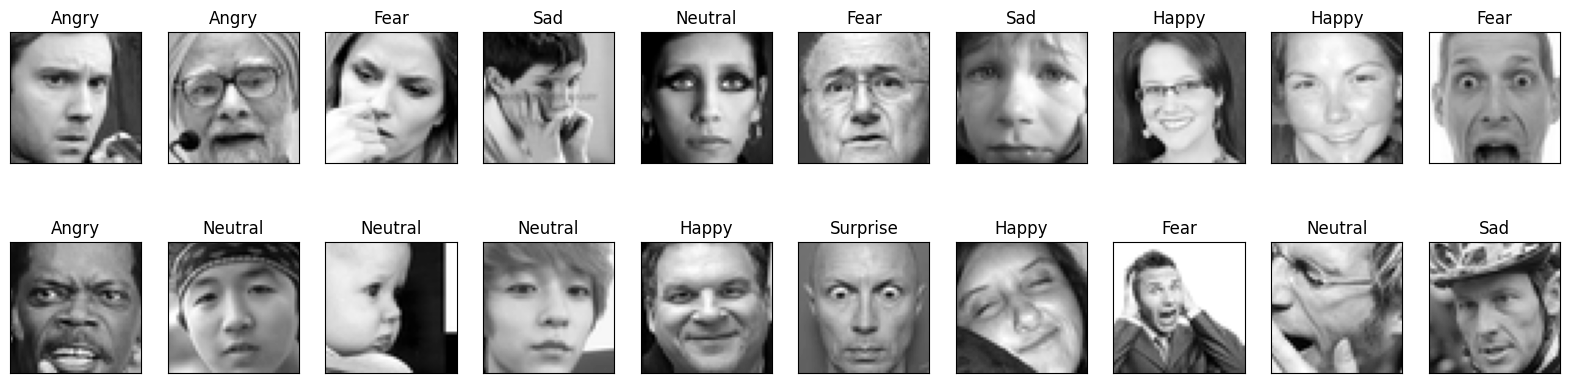

In [ ]:
## showing images here
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=10, figsize=(20, 5))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:20]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title(emotions[label])

show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
# Check data shape.
df.shape

(35887, 2)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Reshape images to 2D array.
images = images.reshape(images.shape[0], -1)
# Fit images.
pca.fit(images) ## modify images' array to the appropriate shape.

PCA(n_components=2)

In [ ]:
## transform for visualizing here.
images_pca = pd.DataFrame(pca.transform(images), columns=["pca1", "pca2"])#make dataframe with pca1 and pca2
images_pca.head()

,pca1,pca2
0,691.750859,-442.328650
1,-62.025489,561.762207
2,-1322.538070,-415.729683
3,-232.277887,656.803934
4,1796.585834,-2005.093951


In [ ]:
# Check data shape after pca.
images_pca.shape

(35887, 2)

In [ ]:
# Style of seaborn.
sns.set_theme()

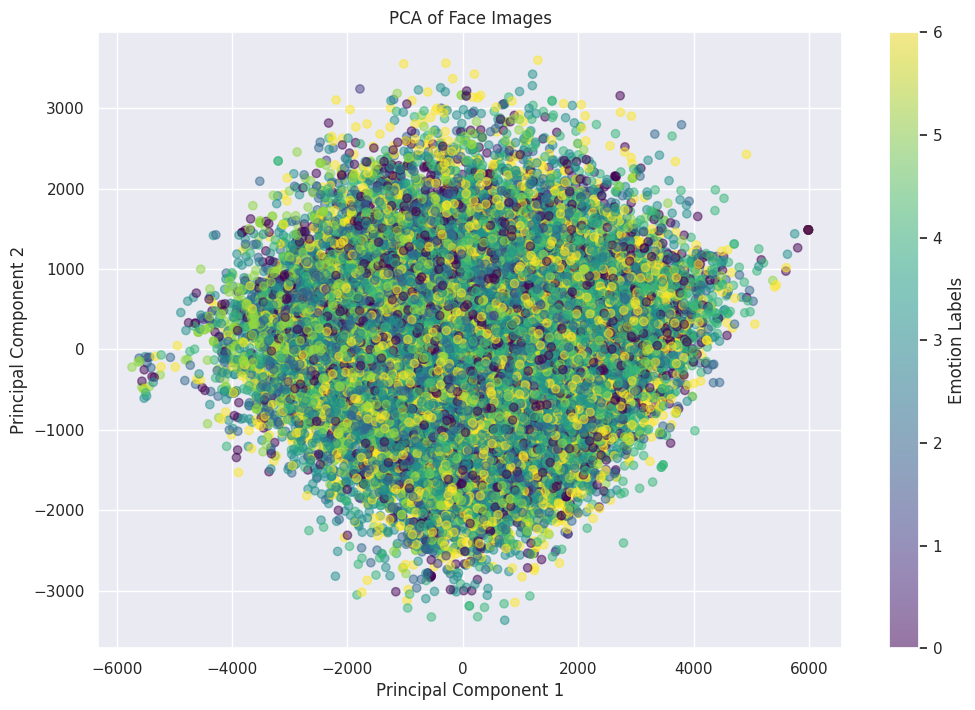

In [ ]:
plt.figure(figsize=(12, 8))
# Creates a scatter plot using the plt.scatter function.
scatter = plt.scatter(images_pca.pca1, images_pca.pca2, c=labels, cmap='viridis', alpha=0.5)
# Creates a colorbar associated with the scatter plot.
cbar = plt.colorbar(scatter, ticks=range(len(np.unique(labels))), label='Emotion Labels')
# Set labels for the axes and a title for the plot.
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Face Images')
# Displays the scatter plot
plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
images = images.reshape(images.shape[0], -1)

In [ ]:
# Initialize PCA
pca = PCA()

# Fit PCA to the data
pca.fit(images)

PCA()

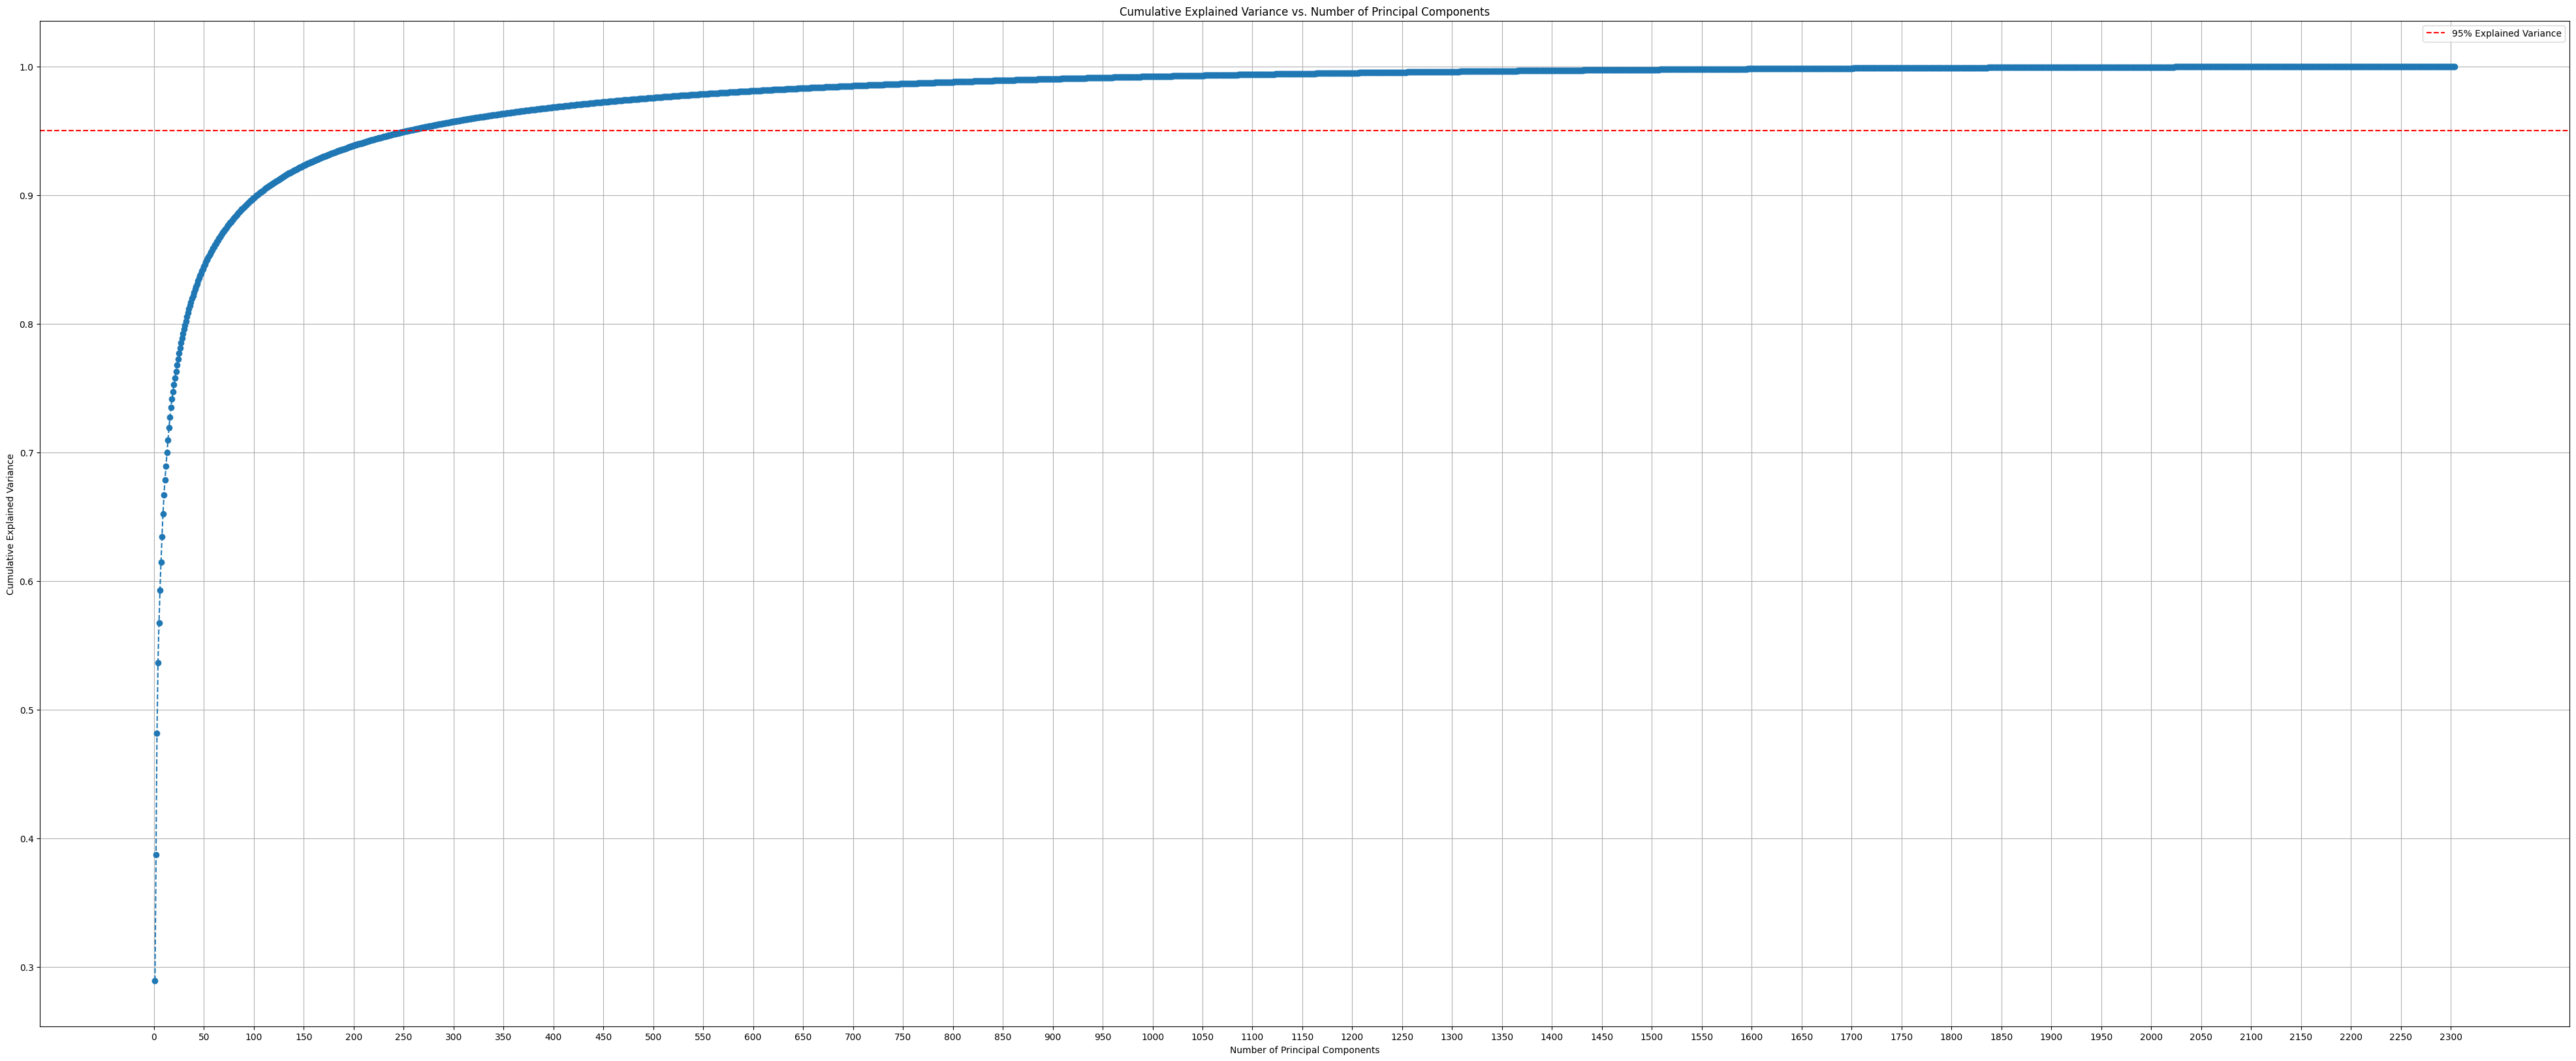

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(50, 20))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')

# Customize x-ticks
plt.xticks(np.arange(0, len(cumulative_explained_variance) + 1, 50))  # Display every 50th tick

plt.legend()
plt.show()

#  Determine the optional component by two ways:

# Cumulative explained variance:

In [ ]:
# Determine the optimal number of components (cumulative explained variance >= 95%)
optimal_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Optimal number of principal components: {optimal_components}')

Optimal number of principal components: 255


# Explained variance

In [ ]:
# Calculate the total variance
explained_variance = pca.explained_variance_
total_variance = pca.explained_variance_.sum()

# Set a threshold at 95% of the total variance
threshold = 0.95 * total_variance
explained_variance_ratio = 0

# Iterate through the principal components to find the optimal number of components
for i in range(len(explained_variance)):
  explained_variance_ratio += explained_variance[i]
  if explained_variance_ratio >= threshold:
    optimal_components = i + 1
    break

print("Optimal number of principal components:", optimal_components)

Optimal number of principal components: 255


In [ ]:
pca_optimal = PCA(n_components=optimal_components)
images_pca = pca_optimal.fit_transform(images)

# Convert the transformed data to a DataFrame for easier viewing
images_pca_df = pd.DataFrame(images_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])
images_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC246,PC247,PC248,PC249,PC250,PC251,PC252,PC253,PC254,PC255
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166387,-52.826669,85.209730,152.914880,...,-10.286852,37.182705,-12.257987,-1.530973,15.760067,6.330813,32.019788,-0.121858,-82.081688,17.840018
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286570,...,-35.533635,4.739807,-76.210702,57.198804,31.906041,-19.640649,108.749564,-0.043988,15.210200,46.983384
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-47.439210,-13.026998,-13.355788,-40.984488,-19.618888,-59.313785,-2.220144,14.069020,94.343471,36.767909
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127227,...,-30.013538,31.358234,22.905502,-24.468812,43.892556,6.391125,29.760953,-8.768200,-37.433845,-48.317021
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006556,...,-1.544630,6.823897,26.150817,-64.550258,14.259130,-81.193282,30.104442,38.572396,-101.514931,-31.455980


# Explain my selection:
Firstly, plotting the Cumulative Explained Variance

To better understand the data and the impact of dimensionality reduction, the first step is to plot the cumulative explained variance. This plot helps visualize how much variance in the data is explained as more principal components are included.

Why This Step is Important:

*   It provides a clear picture of how many principal components are needed to capture a significant amount of variance.
*   It helps identify the "elbow point" where adding more components yields diminishing returns in terms of explained variance.

Secondly, checking with Two Different Methods

*   Method 1: Cumulative explained variane(bonus)

    This method involves calculating the cumulative explained variance ratio and determining the number of principal components at which this ratio reaches at least 95%.
*   Method 2: Explained variance

    This method calculates the total variance of all principal components and finds the number of
    components that capture at least 95% of this total variance.

And why i choosing 95% explained variance? It just beacause 95% strikes a balance between retaining sufficient information and reducing the dimensionality of the data. While other thresholds like 90% or 99% are also feasible, 95% is commonly chosen as it provides a reasonable compromise.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
images = images.reshape(images.shape[0], -1)

In [ ]:
## splitting data into train/val/test subsets here
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (28709, 2304)
Testing set shape: (7178, 2304)


In [ ]:
param_grids_knn = [
    {'n_neighbors': [9],'weights': ['distance'], 'metric': ['minkowski']}
]

param_grids_log_reg = [
    {'C': [0.1], 'solver': ['lbfgs']}
]

param_grid_rf = [
    {'n_estimators': [200], 'max_depth': [15]}
]

param_grid_mlp = [
   {'activation': ['relu'], 'alpha': [0.01], 'hidden_layer_sizes': [(512, 256, 128)], 'learning_rate': ['constant'], 'learning_rate_init': [0.001], 'solver': ['adam']}
]

# Training model with original data

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest

In [ ]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced', random_state=42), param_grid = param_grid_rf, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.50      0.22      0.31       985
           1       0.95      0.34      0.50       102
           2       0.48      0.28      0.35      1043
           3       0.45      0.70      0.55      1765
           4       0.36      0.39      0.37      1210
           5       0.59      0.61      0.60       795
           6       0.43      0.40      0.42      1278

    accuracy                           0.45      7178
   macro avg       0.54      0.42      0.44      7178
weighted avg       0.47      0.45      0.44      7178



# Logistic Regression

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter = 1000), param_grid = param_grids_log_reg, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_log_reg_model = grid_search.best_estimator_
y_test_pred = best_log_reg_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.26      0.21      0.23       985
           1       0.24      0.13      0.17       102
           2       0.23      0.19      0.21      1043
           3       0.44      0.58      0.50      1765
           4       0.23      0.19      0.21      1210
           5       0.38      0.41      0.39       795
           6       0.31      0.30      0.31      1278

    accuracy                           0.33      7178
   macro avg       0.30      0.29      0.29      7178
weighted avg       0.32      0.33      0.32      7178



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNeighbors Classifier

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grids_knn, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_
y_test_pred = best_knn_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.39      0.22      0.28       985
           1       0.41      0.42      0.41       102
           2       0.41      0.30      0.35      1043
           3       0.42      0.51      0.46      1765
           4       0.34      0.29      0.31      1210
           5       0.56      0.49      0.52       795
           6       0.31      0.46      0.37      1278

    accuracy                           0.39      7178
   macro avg       0.40      0.38      0.39      7178
weighted avg       0.40      0.39      0.38      7178



# MLP

In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(max_iter = 300, random_state = 42), param_grid = param_grid_mlp, cv = 5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_mlp_model = grid_search.best_estimator_
y_test_pred = best_mlp_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.38      0.09      0.14       985
           1       0.00      0.00      0.00       102
           2       0.26      0.06      0.10      1043
           3       0.39      0.79      0.52      1765
           4       0.33      0.13      0.18      1210
           5       0.46      0.46      0.46       795
           6       0.31      0.44      0.36      1278

    accuracy                           0.37      7178
   macro avg       0.30      0.28      0.25      7178
weighted avg       0.35      0.37      0.31      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   The emotion category where the model makes the most accurate predictions might be determined by looking at the diagonal elements of the confusion matrix (the true positives).
The category with the highest value in this diagonal has the most accurate predictions.
*    Conversely, the category with the highest off-diagonal elements (false positives and false negatives) would indicate where the model makes the most errors.




#Training model with data transform by PCA

In [ ]:
# Original data transform by PCA
reshaped_images = images.reshape(images.shape[0], -1)
pca = PCA(n_components = optimal_components)
pca.fit(reshaped_images)
images_pca = pca.transform(reshaped_images)

# Split dataset into train set and test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(images_pca, labels, shuffle = True, test_size = 0.2, random_state = 42)

# Random Forest

In [ ]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced', random_state=42), param_grid = param_grid_rf, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

best_rf_model_pca = grid_search.best_estimator_
y_test_pred_pca = best_rf_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.51      0.13      0.21       985
           1       0.94      0.29      0.45       102
           2       0.50      0.23      0.32      1043
           3       0.37      0.75      0.50      1765
           4       0.36      0.30      0.33      1210
           5       0.60      0.50      0.55       795
           6       0.35      0.32      0.33      1278

    accuracy                           0.40      7178
   macro avg       0.52      0.36      0.38      7178
weighted avg       0.44      0.40      0.38      7178



# Logistic Regression

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter = 1000), param_grid = param_grids_log_reg, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

best_log_reg_model_pca = grid_search.best_estimator_
y_test_pred_pca = best_log_reg_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.27      0.16      0.20       985
           1       0.50      0.03      0.06       102
           2       0.25      0.15      0.19      1043
           3       0.44      0.65      0.52      1765
           4       0.27      0.29      0.28      1210
           5       0.46      0.45      0.46       795
           6       0.36      0.35      0.35      1278

    accuracy                           0.37      7178
   macro avg       0.37      0.30      0.30      7178
weighted avg       0.35      0.37      0.35      7178



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNeighbors Classifier

In [ ]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grids_knn, cv = 2, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

best_knn_model_pca = grid_search.best_estimator_
y_test_pred_pca = best_knn_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
              precision    recall  f1-score   support

           0       0.41      0.25      0.31       985
           1       0.41      0.45      0.43       102
           2       0.43      0.32      0.36      1043
           3       0.43      0.54      0.48      1765
           4       0.35      0.29      0.32      1210
           5       0.56      0.53      0.55       795
           6       0.32      0.43      0.36      1278

    accuracy                           0.40      7178
   macro avg       0.42      0.40      0.40      7178
weighted avg       0.41      0.40      0.40      7178



# MLP

Fitting 5 folds for each candidate is too long so I will fit 3 for each instance:

In [ ]:
grid_search = GridSearchCV(estimator = MLPClassifier(max_iter = 300, random_state = 42), param_grid = param_grid_mlp, cv = 3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train_pca)

best_mlp_model_pca = grid_search.best_estimator_
y_test_pred_pca = best_mlp_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
              precision    recall  f1-score   support

           0       0.31      0.31      0.31       985
           1       0.48      0.36      0.41       102
           2       0.35      0.31      0.33      1043
           3       0.53      0.55      0.54      1765
           4       0.32      0.33      0.33      1210
           5       0.64      0.50      0.56       795
           6       0.34      0.39      0.37      1278

    accuracy                           0.41      7178
   macro avg       0.42      0.40      0.41      7178
weighted avg       0.42      0.41      0.41      7178



## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [131]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Random Forest Models

# Confusion matrix with original data

In [164]:
y_test_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31       985
           1       0.95      0.34      0.50       102
           2       0.48      0.28      0.35      1043
           3       0.45      0.70      0.55      1765
           4       0.36      0.39      0.37      1210
           5       0.59      0.61      0.60       795
           6       0.43      0.40      0.42      1278

    accuracy                           0.45      7178
   macro avg       0.54      0.42      0.44      7178
weighted avg       0.47      0.45      0.44      7178



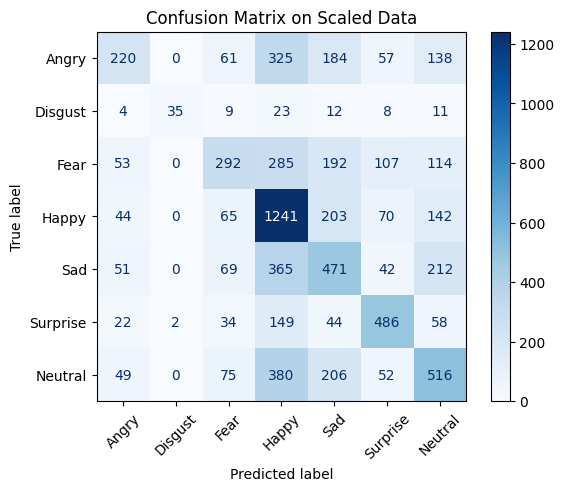

In [165]:
conf_matrix_scaled = confusion_matrix(y_test, y_test_pred)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled, display_labels=emotions)
# conlusion metrix
disp_scaled.plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.45
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 1241 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

# Confusion matrix with data transform by PCA

In [166]:
y_test_pred_pca = best_mlp_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31       985
           1       0.48      0.36      0.41       102
           2       0.35      0.31      0.33      1043
           3       0.53      0.55      0.54      1765
           4       0.32      0.33      0.33      1210
           5       0.64      0.50      0.56       795
           6       0.34      0.39      0.37      1278

    accuracy                           0.41      7178
   macro avg       0.42      0.40      0.41      7178
weighted avg       0.42      0.41      0.41      7178



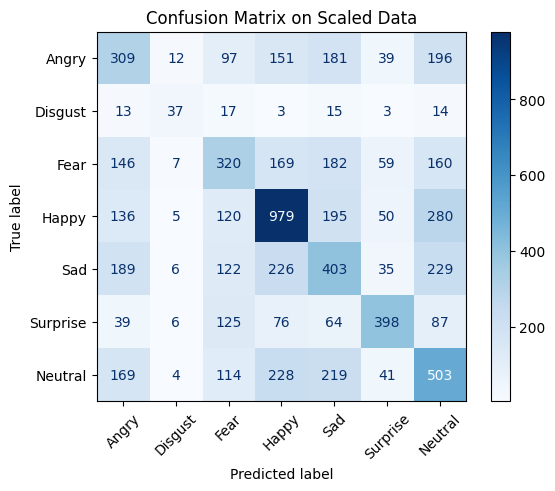

In [167]:
conf_matrix_scaled_pca = confusion_matrix(y_test_pca, y_test_pred_pca)
disp_scaled_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled_pca, display_labels=emotions)
# conlusion metrix
disp_scaled_pca .plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.41
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 979 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

#Logistic Regression Models

# Confusion matrix with original data

In [168]:
y_test_pred = best_log_reg_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.26      0.21      0.23       985
           1       0.24      0.13      0.17       102
           2       0.23      0.19      0.21      1043
           3       0.44      0.58      0.50      1765
           4       0.23      0.19      0.21      1210
           5       0.38      0.41      0.39       795
           6       0.31      0.30      0.31      1278

    accuracy                           0.33      7178
   macro avg       0.30      0.29      0.29      7178
weighted avg       0.32      0.33      0.32      7178



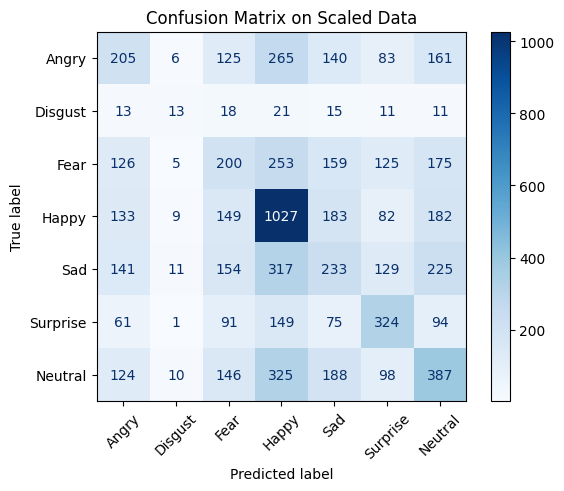

In [169]:
conf_matrix_scaled = confusion_matrix(y_test, y_test_pred)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled, display_labels=emotions)
# conlusion metrix
disp_scaled.plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.33
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 1027 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

# Confusion matrix with data transform by PCA:

In [170]:
y_test_pred_pca = best_log_reg_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.27      0.16      0.20       985
           1       0.50      0.03      0.06       102
           2       0.25      0.15      0.19      1043
           3       0.44      0.65      0.52      1765
           4       0.27      0.29      0.28      1210
           5       0.46      0.45      0.46       795
           6       0.36      0.35      0.35      1278

    accuracy                           0.37      7178
   macro avg       0.37      0.30      0.30      7178
weighted avg       0.35      0.37      0.35      7178



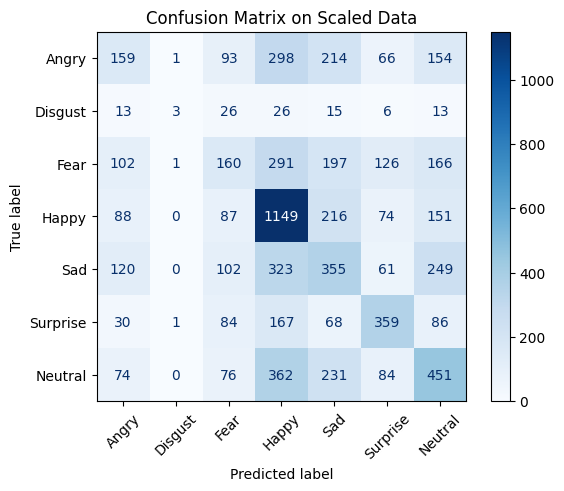

In [171]:
conf_matrix_scaled_pca = confusion_matrix(y_test_pca, y_test_pred_pca)
disp_scaled_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled_pca, display_labels=emotions)
# conlusion metrix
disp_scaled_pca .plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.37
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 1149 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

#KNeighbors Classifier Models

# Confusion matrix with original data

In [162]:
y_test_pred = best_knn_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.39      0.22      0.28       985
           1       0.41      0.42      0.41       102
           2       0.41      0.30      0.35      1043
           3       0.42      0.51      0.46      1765
           4       0.34      0.29      0.31      1210
           5       0.56      0.49      0.52       795
           6       0.31      0.46      0.37      1278

    accuracy                           0.39      7178
   macro avg       0.40      0.38      0.39      7178
weighted avg       0.40      0.39      0.38      7178



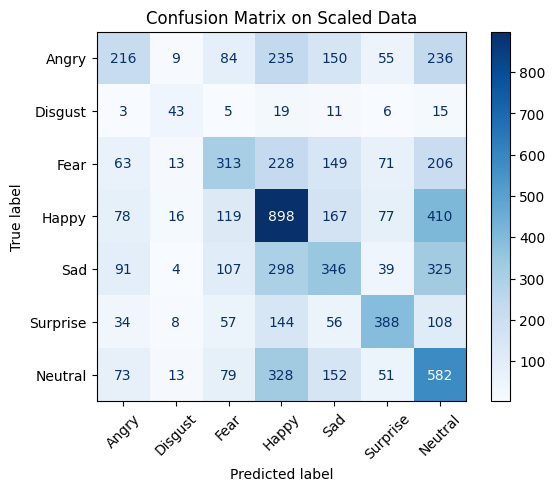

In [163]:
conf_matrix_scaled = confusion_matrix(y_test, y_test_pred)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled, display_labels=emotions)
# conlusion metrix
disp_scaled.plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.39
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 898 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

# Confusion matrix with data transform by PCA

In [172]:
y_test_pred_pca = best_knn_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.41      0.25      0.31       985
           1       0.41      0.45      0.43       102
           2       0.43      0.32      0.36      1043
           3       0.43      0.54      0.48      1765
           4       0.35      0.29      0.32      1210
           5       0.56      0.53      0.55       795
           6       0.32      0.43      0.36      1278

    accuracy                           0.40      7178
   macro avg       0.42      0.40      0.40      7178
weighted avg       0.41      0.40      0.40      7178



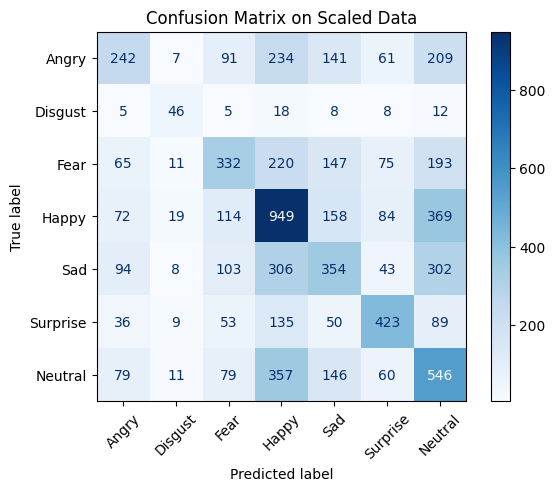

In [173]:
conf_matrix_scaled_pca = confusion_matrix(y_test_pca, y_test_pred_pca)
disp_scaled_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled_pca, display_labels=emotions)
# conlusion metrix
disp_scaled_pca .plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.40
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 949 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

#MLP Models

# Confusion matrix with original data

In [174]:
y_test_pred = best_mlp_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.38      0.09      0.14       985
           1       0.00      0.00      0.00       102
           2       0.26      0.06      0.10      1043
           3       0.39      0.79      0.52      1765
           4       0.33      0.13      0.18      1210
           5       0.46      0.46      0.46       795
           6       0.31      0.44      0.36      1278

    accuracy                           0.37      7178
   macro avg       0.30      0.28      0.25      7178
weighted avg       0.35      0.37      0.31      7178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


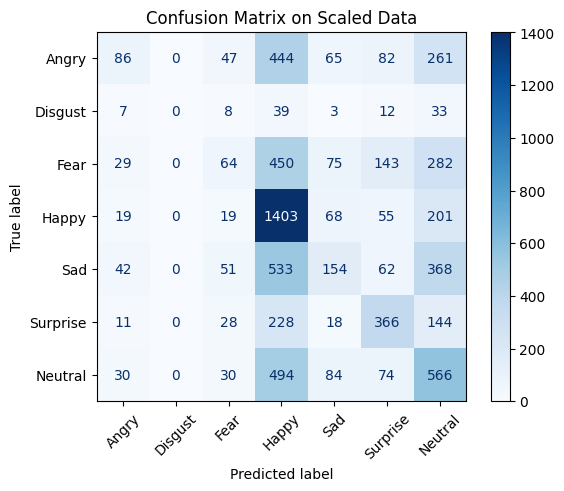

In [175]:
conf_matrix_scaled = confusion_matrix(y_test, y_test_pred)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled, display_labels=emotions)
# conlusion metrix
disp_scaled.plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.37
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 1403 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

# Confusion matrix with data transform by PCA

In [176]:
y_test_pred_pca = best_mlp_model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_test_pred_pca))

              precision    recall  f1-score   support

           0       0.31      0.31      0.31       985
           1       0.48      0.36      0.41       102
           2       0.35      0.31      0.33      1043
           3       0.53      0.55      0.54      1765
           4       0.32      0.33      0.33      1210
           5       0.64      0.50      0.56       795
           6       0.34      0.39      0.37      1278

    accuracy                           0.41      7178
   macro avg       0.42      0.40      0.41      7178
weighted avg       0.42      0.41      0.41      7178



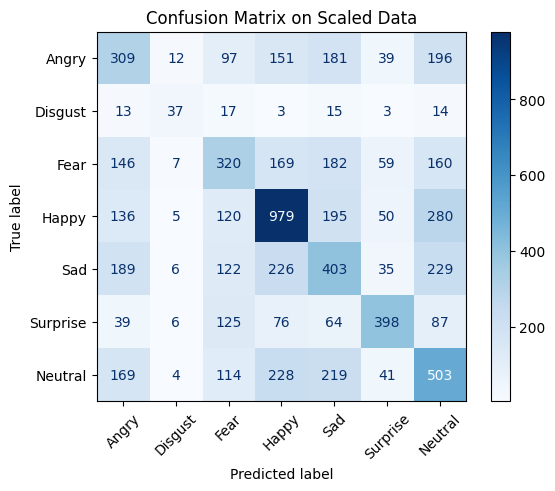

In [177]:
conf_matrix_scaled_pca = confusion_matrix(y_test_pca, y_test_pred_pca)
disp_scaled_pca = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_scaled_pca, display_labels=emotions)
# conlusion metrix
disp_scaled_pca .plot( xticks_rotation='vertical', cmap='Blues')
plt.title('Confusion Matrix on Scaled Data')
plt.xticks(np.arange(len(emotions)), emotions, rotation=45)
plt.yticks(np.arange(len(emotions)), emotions)
plt.show()

- **Accuracy**: 0.41
- **Confusion Matrix Analysis**:
  - **Most Accurate**: "Happy" with 979 correctly classified samples.
  - **Most Errors**: "Disgust" with many samples misclassified as "Happy"

####Overall Performance Summary

####Best Performing Model

-   **Model**: Random Forest (Original Data)
-   **Reason**: Random Forest is an ensemble learning method, which combines the predictions of multiple decision trees. This versatility allows it to perform better in varied and noisy data conditions compared to single-model approaches.

#### Most Accurate Emotion Category: Class "Happy"
*   **Reason**: The "Happy" class is the most accurately predicted class across most models. This could be due to the clear and distinctive features of this emotion, making it less ambiguous compared to others.

#### Emotion Categories with Most Errors
- **Classes "Disgust" **:
  - **High Misclassification Rates**: Most models struggled significantly with the "Disgust" classes, often misclassifying them into other categories. This suggests that the features of these emotions overlap significantly with other emotions, making them harder to distinguish.
  - **Ambiguity and Similarity**: The inherent ambiguity and similarity of "Disgust" with other emotions like "Sad" and "Angry" contribute to the higher misclassification rates. These emotions may share common features, leading to confusion in the model's predictions.
  - **Class Imbalance**: If the dataset has fewer examples of "Disgust" compared to more prevalent emotions like "Happy," the models may not have had enough data to learn the subtle distinctions. This imbalance can result in poorer performance for these categories.